In [3]:
# Enable autoreload so updates to data.py are reflected without restarting kernel
%load_ext autoreload
%autoreload 2


In [4]:

from data.processed_mimic.aggregate_mimic import load_mimic_tables, select_labs, aggregate_labs, merge_with_patients_admissions, save_dataset

In [5]:
# MIMIC iv dataset
patients, admissions, labevents, labitems = load_mimic_tables()
selected_labs = ['Potassium', 'Sodium', 'Creatinine', 'Chloride', 'Urea Nitrogen', 'Hematocrit']
filtered = select_labs(labevents, labitems, selected_labs)
admission_labs = aggregate_labs(filtered)
full_data = merge_with_patients_admissions(admission_labs, patients, admissions)
save_dataset(full_data)


Loading raw MIMIC CSVs...


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/mimic-iv-clinical-database-demo-2.2/hosp\\patients.csv.gz'

In [6]:
import pandas as pd
import numpy as np
import os

# Settings
n_samples = 1000
n_vars = 20

# Ensure CSV saves in the right folder
processed_path = "data/processed"
os.makedirs(processed_path, exist_ok=True)

# Generate synthetic data
np.random.seed(42)
synthetic_data = pd.DataFrame(np.random.randn(n_samples, n_vars),
                              columns=[f"X{i}" for i in range(1, n_vars+1)])

# Save CSV
output_file = os.path.join(processed_path, "synthetic_data.csv")
synthetic_data.to_csv(output_file, index=False)

print(f"Synthetic dataset saved to {output_file}")


Synthetic dataset saved to data/processed\synthetic_data.csv


In [8]:
import sys
sys.executable


'c:\\Users\\sofia\\OneDrive\\Υπολογιστής\\Thesis_New\\.venv\\Scripts\\python.exe'

In [6]:
 !c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New\.venv\Scripts\python.exe -m pip install jpype1


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
os.path.exists(r"C:\Program Files\Eclipse Adoptium\jdk-17.0.17.10-hotspot\bin\server\jvm.dll")


True

In [ ]:
# import jpype

# jvm_path = r"C:\Program Files\Eclipse Adoptium\jdk-17.0.17.10-hotspot\bin\server\jvm.dll"

# if not jpype.isJVMStarted():
#     jpype.startJVM(
#         jvm_path,
#         "-ea",
#         classpath=[r"jar_files/*"]
#     )


In [ ]:
# #import jpype
# #jpype.startJVM("-ea", classpath=['jar_files/*'])

# from data.data_generation.simulate_data import simulate_data_tetrad_simple

# dag, data = simulate_data_tetrad_simple(
#     n_nodes=10,
#     n_samples=500,
#     avg_degree=2,
#     max_degree=3,
#     seed=1
# )

# print(data.head())
# print(dag)


c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New\data\data_generation\tetrad_graph_to_array.py:26: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('X(\d+):(\d+)', tetrad_var_name)
c:\Users\sofia\OneDrive\Υπολογιστής\Thesis_New\data\data_generation\tetrad_graph_to_array.py:31: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('X(\d+)', tetrad_var_name)


ImportError: Java package 'edu' not found, requested by alias 'edu'

In [11]:
from data.data_generation.final_scm_simulator import simulate_linear_scm

dag, data = simulate_linear_scm(
    n_nodes=10,
    n_samples=500,
    avg_degree=2,
    seed=1
)



print(data.head())
print(dag)


         X1        X2        X3        X4        X5        X6        X7  \
0 -1.017014 -0.626865 -0.270651  1.538665  0.396552 -0.907016 -0.834781   
1  0.637362  3.270566  0.892535 -6.688406  0.719065  3.885516 -0.891779   
2 -0.859907 -0.307041  1.056178  1.538872  1.967886 -0.808545  1.974394   
3  1.772608 -0.384749 -0.982546  1.137254 -0.319918 -0.703828 -1.435484   
4 -1.110363  0.015189 -0.206393  0.182597  0.545313  0.280637  1.432898   

         X8        X9       X10  
0  2.103559 -0.752083  0.330564  
1 -4.881806 -0.253451 -3.658519  
2 -4.366951 -0.409814 -5.063558  
3  4.843091  0.572791  3.406730  
4 -2.612952  0.619171 -2.724994  
     X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
X1    0   1   1   0   0   0   0   0   0    0
X2    0   0   1   0   0   1   0   0   0    0
X3    0   0   0   0   0   0   0   0   0    0
X4    0   0   1   0   1   1   0   0   0    0
X5    0   0   0   0   0   0   0   1   0    0
X6    0   0   0   0   0   0   0   0   0    0
X7    0   0   0   0   0   1   

In [12]:
# Save to CSV
data.to_csv("simulated_data.csv", index=False)
dag.to_csv("simulated_dag.csv")


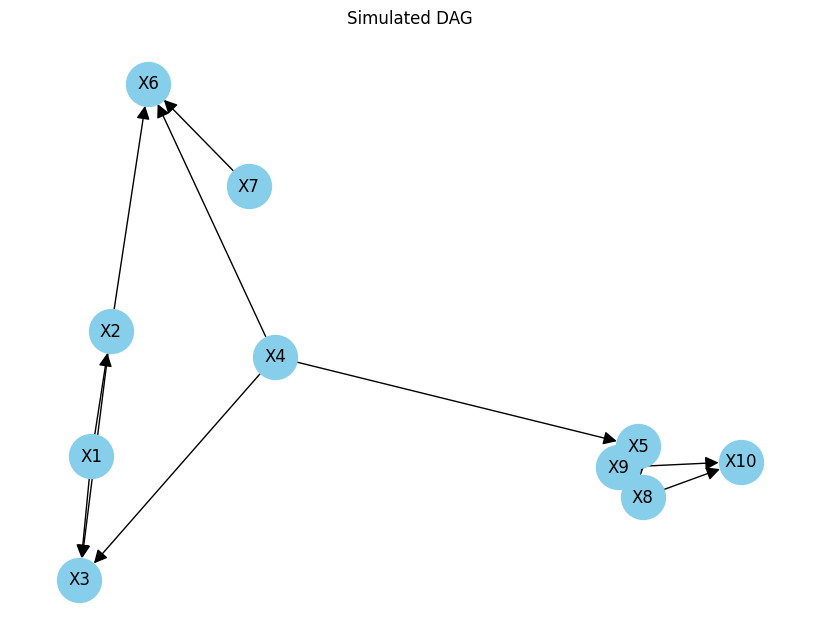

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the adjacency matrix to a networkx DiGraph
G = nx.from_pandas_adjacency(dag, create_using=nx.DiGraph)

# Draw the DAG
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # nice layout
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', arrowsize=20)
plt.title("Simulated DAG")
plt.show()
